In [243]:
##importing all the necessary files
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_curve,confusion_matrix,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
import nltk


In [18]:
print(nltk.data.path)

['C:\\Users\\sbana/nltk_data', 'C:\\Users\\sbana\\anaconda3\\envs\\py_gpu\\nltk_data', 'C:\\Users\\sbana\\anaconda3\\envs\\py_gpu\\share\\nltk_data', 'C:\\Users\\sbana\\anaconda3\\envs\\py_gpu\\lib\\nltk_data', 'C:\\Users\\sbana\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [19]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sbana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [21]:
df_train=pd.read_csv(r'D:\BANASHREE\KAGGLE DATASETS\quora\train.csv')

In [22]:
df_test=pd.read_csv(r'D:\BANASHREE\KAGGLE DATASETS\quora\test.csv')

In [23]:
df_train.shape,df_test.shape

((1306122, 3), (375806, 2))

In [24]:
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [25]:
#some sample incinsere questions
df_train[df_train['target']==1].head(3)

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1


In [26]:
df_test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


Imbalance Dataset

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


C:\Users\sbana\anaconda3\envs\py_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sbana\anaconda3\envs\py_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sbana\anaconda3\envs\py_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


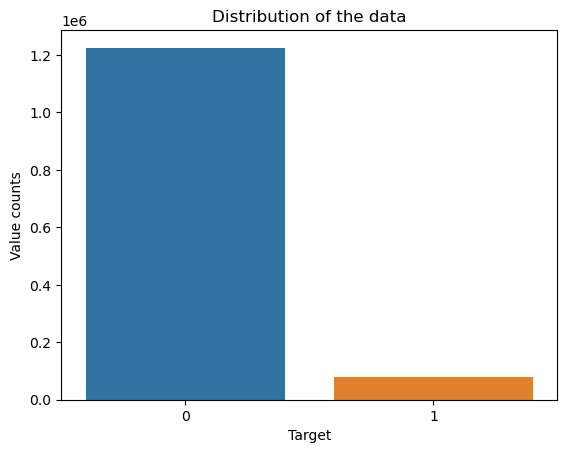

In [28]:
#distribution of the data
sns.countplot(x='target',data=df_train)
plt.xlabel('Target')
plt.ylabel('Value counts')
plt.title('Distribution of the data')
plt.show()

Data is highly imbalanced

In [67]:
df_train['target'].value_counts()

target
0    1225312
1      80810
Name: count, dtype: int64

In [30]:
print((df_train['target']==0).sum()/df_train.shape[0]*100,'% of the data are sincere')
print(100-((df_train['target']==0).sum()/df_train.shape[0]*100),'% of data are insincere')

93.81298224821265 % of the data are sincere
6.1870177517873515 % of data are insincere


Clearly the data is highly imbalanced. For the baseline model, even if predict always 0, we would be correct (1225312/1306122)*100 = 93.81 percent of time.!!!

Also, using accuracy as a measure of correctness in such dataset can be higly misleading. F1 score given a more accurate measure in such cases

In [31]:
ros=RandomUnderSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(df_train.drop('target',axis=1),df_train['target'])


In [32]:
df_train_b=pd.concat([X_resampled,Y_resampled],axis=1)

C:\Users\sbana\anaconda3\envs\py_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sbana\anaconda3\envs\py_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sbana\anaconda3\envs\py_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


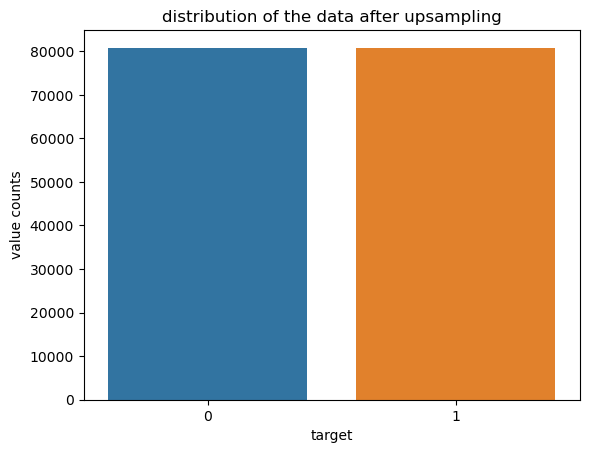

In [33]:
sns.countplot(x='target',data=df_train_b)
plt.xlabel('target')
plt.ylabel('value counts')
plt.title('distribution of the data after upsampling')
plt.show()

we can see that, now the data is balanced with both the classes having the same number of data points

In [34]:
df_train_b.sha

(161620, 4)

In [68]:
df_train_b['target'].value_counts()

target
0    80810
1    80810
Name: count, dtype: int64

#Text preprocessing

In [58]:
text='Who are entrepreneurs?'
words=word_tokenize(text)
for num,i in enumerate(words):
  words[num]=i.lower()


In [59]:
words

['who', 'are', 'entrepreneurs', '?']

In [60]:
#list of stopwords and punctuations, we can create our own list. I stick to the default lists.
stopwords_english=stopwords.words('english')
print('stopwords',stopwords_english)
print('punctuation',string.punctuation)

stopwords ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',

In [61]:
clean_words=[]
for word in words:
    if (word not in stopwords_english and word not in string.punctuation):
        clean_words.append(word)
clean_words        

['entrepreneurs']

In [62]:
stemmer=PorterStemmer()

In [63]:
stem_words=[]
for word in clean_words:
    stem_word=stemmer.stem(word)
    stem_words.append(stem_word)
stem_words

['entrepreneur']

Finally we write a general function which will preprocess the text data with all the previous steps. 

In [56]:
def preprocess(text):
    words=word_tokenize(text)
    for num,i in enumerate(words):
      words[num]=i.lower()
    clean_words=[]
    for word in words:
        if (word not in stopwords_english and word not in string.punctuation):
            clean_words.append(word)
    stem_words=[]
    for word in clean_words:
        stem_word=stemmer.stem(word)
        stem_words.append(stem_word)
    return stem_words



In [57]:
preprocess('Who are entrepreneurs?')

['entrepreneur']

In [65]:
df_train_b['question_text']=df_train_b['question_text'].apply(lambda x:preprocess(x))

In [88]:
df_train_b.shape

(161620, 4)

VECTORIZATION


In [113]:
#reduce test dataset for as it is exceeding system memory 
mini_df=df_train_b.sample(3000,random_state=42)

# X=trad_data['question_text']
# Y=trad_data['target']

# train_X,val_X,train_y,val_y=train_test_split(X,Y,test_size=0.2,random_state=seed)

In [80]:
df_train_b['processed_text']=df_train_b['question_text'].apply(lambda x:' '.join(x))

In [124]:
mini_df=df_train_b.sample(3000,random_state=42)
mini_df.head()
X=mini_df['processed_text']
Y=mini_df['target']
train_X,val_X,train_y,val_y=train_test_split(X,Y,test_size=0.2,random_state=42)

In [125]:
train_X.shape,val_X.shape

((2400,), (600,))

In [155]:
train_y.shape

(2400,)

In [85]:
# df_train_b['processed_text'].values.tolist()

In [126]:
vectorizer=TfidfVectorizer()
X_train_tfidf=vectorizer.fit_transform(train_X)
X_train_tfidf.shape

(2400, 5158)

In [128]:
X_test_tfidf=vectorizer.transform(val_X)
X_test_tfidf.shape


(600, 5158)

THUS WE HAVE 5158 NUMBER OF FEATURES, ITS A VERY LARGE NUMBER OF FEATURES. PCA is a option but PCA doesnt support sparse input, so I am using truncated SVD nad taking the top 50 components


In [120]:
tsvd=TruncatedSVD(n_components=50,random_state=42)


In [131]:
X_train_reduced=tsvd.fit_transform(X_train_tfidf)
X_test_reduced=tsvd.fit_transform(X_test_tfidf)
X_train_reduced.shape,X_test_reduced.shape

((2400, 50), (600, 50))

MODEL SELECTION

In [157]:
def get_predictions(model,train_X,train_Y,val_X, val_Y):
    model.fit(train_X,train_Y)
    pred_probs=model.predict_proba(val_X)[:,1]
    pred_val=model.predict(val_X)
    score=f1_score(val_Y,pred_val)
    return pred_probs,pred_val,score

In [241]:
def get_confusion_matrix(val_Y,pred,title):
    cm=confusion_matrix(val_Y,pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm,annot=True)
    plt.title(title)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
def roc_auc_curve(val_y,pred_probs,title):
   
    fpr, tpr, thresholds = roc_curve(val_y,pred_probs )
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
    


In [148]:
LR=LogisticRegression()

In [149]:
model_1={'model':LR, 'name': 'logistic_regression'}

In [153]:
model_1['model']

LogisticRegression()

In [161]:
pred_probs_model1,pred_model1,f1_score_model1=get_predictions(model_1['model'],X_train_tfidf,train_y,X_test_tfidf, val_y)
print('f1_score of Logistic_regression',f1_score_model1)

f1_score of Logistic_regression 0.8198347107438017


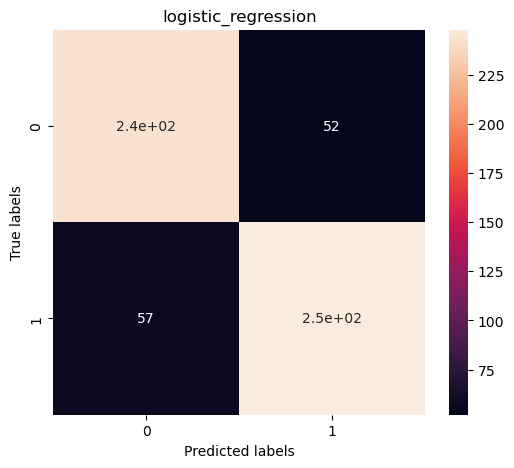

In [239]:
get_confusion_matrix(val_y,pred_model1,model_1['name'])

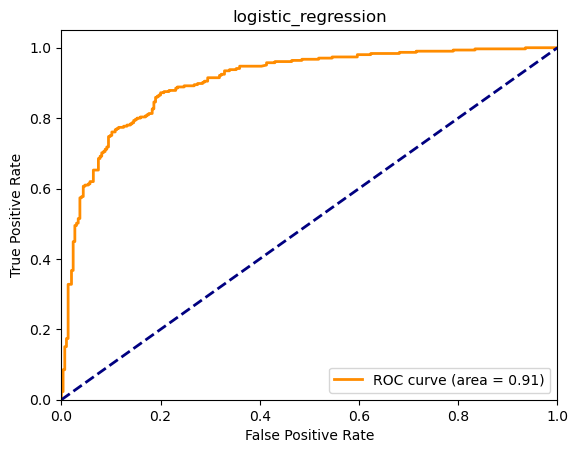

In [244]:
roc_auc_curve(val_y,pred_probs_model1,model_1['name'])

In [188]:
SVM=SVC(kernel='linear',probability=True)

In [189]:
model_2={'model':SVM, 'name': 'SVM CLASSIFIER'}
model_2['model']

SVC(kernel='linear', probability=True)

In [190]:
pred_probs_model2,pred_model2,f1_score_model2=get_predictions(model_2['model'],X_train_tfidf,train_y,X_test_tfidf, val_y)
print('f1_score of SVM',f1_score_model2)

f1_score of SVM 0.8202614379084968


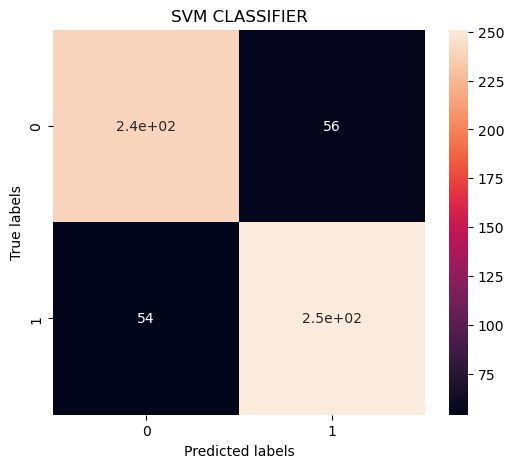

In [191]:
get_confusion_matrix(val_y,pred_model2,model_2['name'])

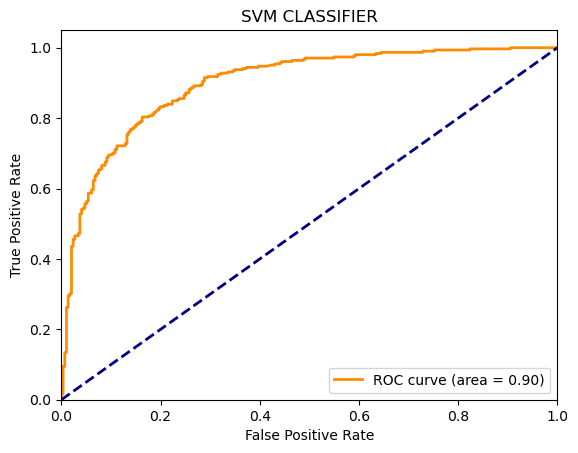

In [245]:
roc_auc_curve(val_y,pred_probs_model2,model_2['name'])

In [206]:
LC = LogisticRegression(penalty='l1', C=1.0,solver='liblinear')

In [207]:
model_3={'model': LC, 'name': 'logistic with l1'}
model_3['model']

LogisticRegression(penalty='l1', solver='liblinear')

In [208]:
pred_probs_model3,pred_model3,f1_score_model3=get_predictions(model_3['model'],X_train_tfidf,train_y,X_test_tfidf, val_y)
print('f1_score of Ridge classifier',f1_score_model3)

f1_score of Ridge classifier 0.7741935483870968


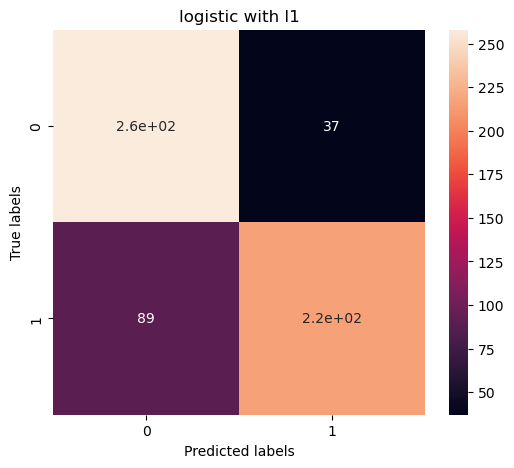

In [209]:
get_confusion_matrix(val_y,pred_model3,model_3['name'])

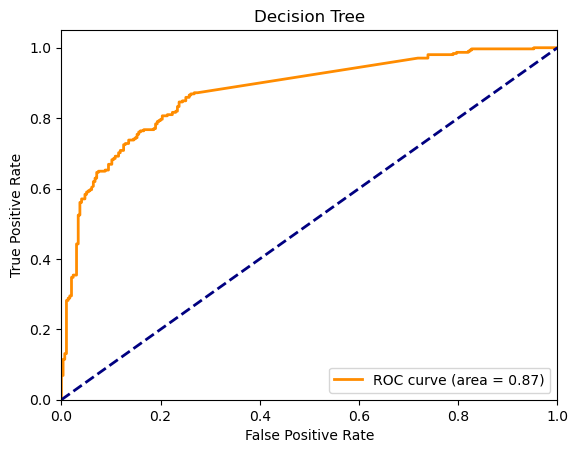

In [246]:
roc_auc_curve(val_y,pred_probs_model3,model_3['name'])

In [225]:
DC=DecisionTreeClassifier()

In [226]:
model_4={'model': DC, 'name': 'Decision Tree'}
model_4['model']

DecisionTreeClassifier()

In [227]:
pred_probs_model4,pred_model4,f1_score_model4=get_predictions(model_4['model'],X_train_tfidf,train_y,X_test_tfidf, val_y)
print('f1_score of Decision Tree classifier',f1_score_model4)

f1_score of Decision Tree classifier 0.7623762376237625


In [233]:
RF=RandomForestClassifier(n_estimators=150)

In [234]:
model_5={'model': RF, 'name': 'Random Forest'}
model_5['model']

RandomForestClassifier(n_estimators=150)

In [235]:
pred_probs_model5,pred_model5,f1_score_model5=get_predictions(model_5['model'],X_train_tfidf,train_y,X_test_tfidf, val_y)
print('f1_score of Random Forest classifier',f1_score_model5)

f1_score of Random Forest classifier 0.8184931506849316


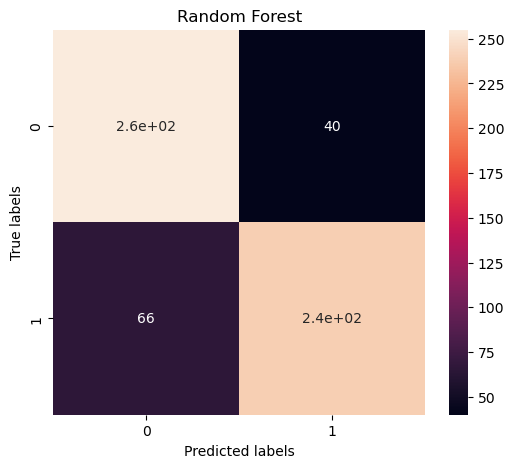

In [236]:
get_confusion_matrix(val_y,pred_model5,model_5['name'])